#### Data analysis notebook

Reads in the data files and plot results



In [1]:
from RunManager import RunManager
from Geant4Analyzer import Geant4Analyzer
import matplotlib.pyplot as plt
import numpy as np


In [2]:
manager = RunManager("../run/rundb.json")
display(manager.display_all_runs(include_deleted=False))

,id,particle,ion,energy,sourceVolume,outputDir,outputFile,numEvents,numJobs,randomSeed,settingsFile,status
0,run_01,ion,11 22,None,,/data/xenon/acolijn/G4XamsSim/20240908_225627,na22,10000000,10,417405,settings.json,active
1,run_02,ion,11 22,None,,/data/xenon/acolijn/G4XamsSim/20240910_163651,na22,100000,1,24638,settings.json,active
2,run_03,ion,11 22,None,,/data/xenon/acolijn/G4XamsSim/20240910_164054,na22,100000,1,664379,settings.json,active
3,run_04,ion,11 22,None,,/data/xenon/acolijn/G4XamsSim/20240910_172013,na22,100000,1,337858,settings.json,active
4,run_05,ion,11 22,None,,/data/xenon/acolijn/G4XamsSim/20240910_174538,na22,100000,1,345107,settings.json,active
5,run_06,ion,11 22,None,,/data/xenon/acolijn/G4XamsSim/20240910_180430,na22,100000,1,739232,settings.json,active


In [45]:
# cut on the global event variables
idet = 1 # liquid xenon

cut = lambda data: (data['ndet'][:,idet] > 0 )
# additional cuts on the clusters
cut_hit = lambda data: (data['r'] < 35.) & (data['zh'] < 0.) & (data['zh']>-60.) & (data['eh'] > 0.)

std = Geant4Analyzer("run_06", first_only=False)
std.preprocess_data(cut=cut, cut_hit=cut_hit)


Loading /data/xenon/acolijn/G4XamsSim/20240910_180430/na22_0.root
Data loaded from 1 files


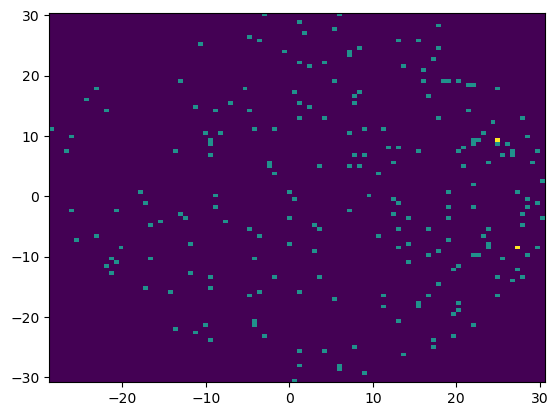

In [46]:
h = plt.hist2d(std.data['xh'], std.data['yh'], bins=100)

integral = 214.0


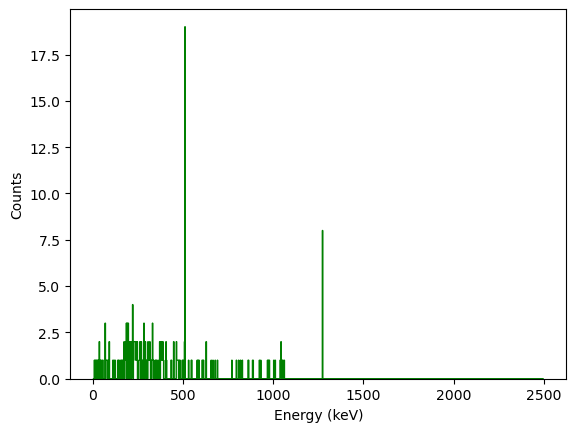

In [47]:
ax = std.plot_histogram("eh", bins=1000, range=(0, 2500), show=False)
ax.set_yscale('linear')
plt.show()

Text(0, 0.5, 'z (mm)')

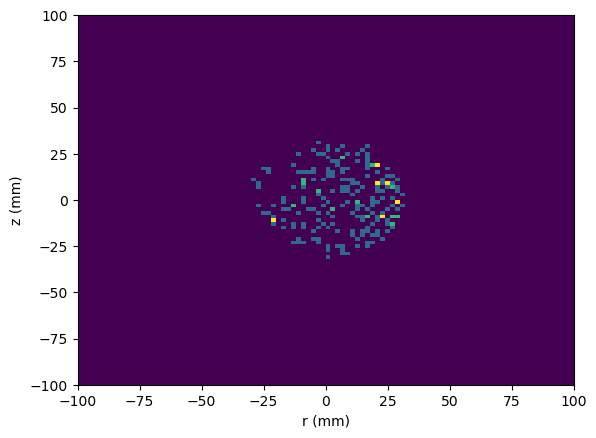

In [48]:
h2 = plt.hist2d(std.data['xh'][std.data['id']==1], std.data['yh'][std.data['id']==1], bins=100, range=((-100, 100), (-100, 100)))
plt.xlabel("r (mm)")
plt.ylabel("z (mm)")

Text(0, 0.5, 'z (mm)')

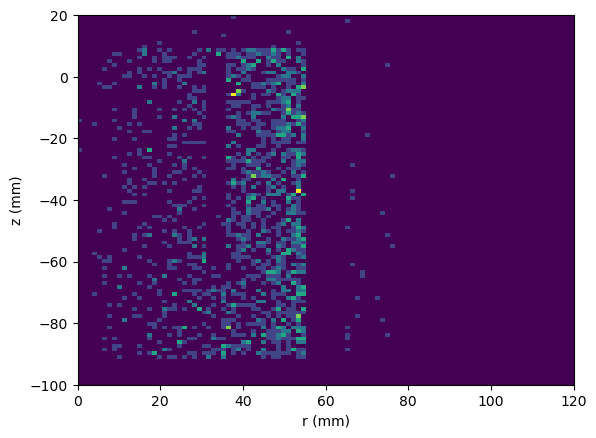

In [34]:
h2 = plt.hist2d(std.data['r'], std.data['zh'], bins=100, range=((0, 120), (-100, 20)))
plt.xlabel("r (mm)")
plt.ylabel("z (mm)")